# 오전

### seaborn

In [84]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt

mat.rcParams['font.family'] = 'Malgun Gothic'
plt.rc("axes", unicode_minus = False)

In [4]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
df["deck"].value_counts(dropna=False) # 유일한 값의 개수를 셈

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [9]:
df["deck"].isnull() # null 있나 없나 확인 T/F null이 있으면 True

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: deck, Length: 891, dtype: bool

In [ ]:
df["deck"].notnull() # null이 있나 없나 확인2 T/F null이 있으면 false

In [10]:
# null 개수 확인
df.isnull().sum(axis = 0)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
# age column의 null 처리
# 1. 제거하는 방법
df_age = df.dropna(subset = ["age"], how = "any", axis = 0)
print(len(df), len(df_age))

891 714


In [14]:
mean = df["age"].mean(axis = 0)
mean

29.69911764705882

In [19]:
# 2. 치환
mean_age = df["age"].fillna(np.floor(df["age"].mean(axis = 0)))
mean_age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    29.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [ ]:
df_t = df.dropna(axis = 1, thresh = 500) # parameter / thresh = null이 n개 이상 drop
df_t.head()

# 1. 제거하는 방법
df_age = df.dropna(subset = ["age"], how = any, axis = 0)
print(len(df), len(df_age))

# 2. 치환하는 방법 : 평균
# 아까 했음

In [20]:
# 문자의 경우
df.isnull().sum(axis = 0)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [24]:
# 1. 가장 많이 나오는 값으로 치환
most_freq = df["embark_town"].value_counts(dropna=True).idxmax()
df_em = df["embark_town"].fillna(most_freq)
df_em[825:830]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
Name: embark_town, dtype: object

In [ ]:
# 2. 앞 또는 뒤에 나오는 값으로 치환
df["embark_town"].fillna(method="ffill")[825:830] # method = "f"fill은 앞, "b"fill은 뒤의 값으로 채움

In [ ]:
# titanic 데이터를 로드해서 df에 저장한 후
# 1. 각 자료의 null 개수 확인
# 2. null 개수가 전체 데이터의 절반이 넘으면 삭제
# 3. null 데이터의 컬럼이 숫자인 경우 해당 컬럼의 최소값으로 null 대체
# 4. null 데이터의 컬럼이 문자인 경우 해당 컬럼의 드에 오는 값으로 대체

In [26]:
# titanic 데이터를 로드해서 df에 저장한 후
# 1. 각 자료의 null 개수 확인
df = sns.load_dataset("titanic")
df.isnull().sum(axis = 0)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [34]:
# 2. null 개수가 전체 데이터의 절반이 넘으면 삭제
df.dropna(thresh = len(df)/2, axis = 1, inplace = True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [63]:
dft = sns.load_dataset("titanic")

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [46]:
# 3. 컬럼의 데이터가 숫자인 경우 null을 해당 컬럼의 최소값으로 null 대체
df["age"].fillna(df["age"].min(), inplace=True)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
# 4. 컬럼의 데이터가 문자인 경우 null을 해당 컬럼의 드에 오는 값으로 대체
df["age"].fillna(method = "bfill", inplace=True)

In [52]:
# "mpg" dataset -> null 확인 후 결정 처리
df_mpg = sns.load_dataset("mpg")
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [51]:
df_mpg["horsepower"].fillna(df_mpg["horsepower"].mean(), inplace = True)
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


### 중복데이터 처리

In [54]:
# 중복 데이터를 갖는 데이터프레임 만들기
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
df 

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [56]:
df["c2"].duplicated() # ["컬럼"]의 중복값 확인
df.duplicated() # 인덱스별 중복값 확인

# 중복 제거
df2 = df.copy()
df2.drop_duplicates() # row 기준

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [64]:
df3 = df.copy()
df3.drop_duplicates(subset = ["c3"]) # column 기준

,c1,c2,c3
0,a,1,1
2,b,1,2


### 데이터 표준화

In [83]:
df_mpg = sns.load_dataset("mpg")
df_mpg.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


In [84]:
# 단위환산 : 마일 => km, 갤런 => 리터
mpg_to_kl = 1.60934 / 3.78541

df_mpg["kl"] = df_mpg["mpg"] * mpg_to_kl
df_mpg["kl"] = df_mpg["kl"].round(2) # 소수점 미만 2자리
df_mpg.head(3)
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
 9   kl            398 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 31.2+ KB


In [85]:
# horsepower 자료에 null 확인 및 없애고 시작
df_mpg.dropna(subset = ["horsepower"], axis = 0, inplace = True)
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
 9   kl            392 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 33.7+ KB


In [88]:
# 자료형을 변환
print(df_mpg["origin"].dtypes) # 오브젝트 확인

object


In [89]:
df_mpg["origin"].dtypes # 주소만 갖고 있음

dtype('O')

In [103]:
# 범주형 데이터를 확인 후 변경 astype("int", "str", ... shift + tab 눌러봐라)
df_mpg["origin"] = df_mpg["origin"].astype("category") # .astype("변환형") 변환형으로 형변환

# 오후

### 데이터 표준화 2

In [95]:
df_1 = pd.read_csv("C:/users/universe/ygl_ai/jungilwoong/python/data/auto-mpg.csv")
df_1.columns = ["mpg", "cylinders",	"displacement",	"horsepower",	"weight",	"acceleration",	"model_year",	"origin",	"name" ]
df_1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
394,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [96]:
df_1["horsepower"].unique()

array(['165.0', '150.0', '140.0', '198.0', '220.0', '215.0', '225.0',
       '190.0', '170.0', '160.0', '95.00', '97.00', '85.00', '88.00',
       '46.00', '87.00', '90.00', '113.0', '200.0', '210.0', '193.0', '?',
       '100.0', '105.0', '175.0', '153.0', '180.0', '110.0', '72.00',
       '86.00', '70.00', '76.00', '65.00', '69.00', '60.00', '80.00',
       '54.00', '208.0', '155.0', '130.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [99]:
df_1["horsepower"].replace("?", np.nan, inplace = True)
df_1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
394,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [ ]:
# "?" -> null로 변환
df_1["horsepower"].replace("?", np.nan, inplace = True)
df_1.dropna(subset = ["horsepower"], axis = 0, inplace = True)

In [100]:
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
 9   kl            392 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 33.7+ KB


In [ ]:
df_mpg["model_year"].sample(10) # 임의로 10개 샘플링

In [104]:
df_mpg["model_year"] = df_mpg["model_year"].astype("category")
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   model_year    392 non-null    category
 7   origin        392 non-null    category
 8   name          392 non-null    object  
 9   kl            392 non-null    float64 
dtypes: category(2), float64(5), int64(2), object(1)
memory usage: 29.1+ KB


In [105]:
df_mpg["origin"].unique()

['usa', 'japan', 'europe']
Categories (3, object): ['usa', 'japan', 'europe']

In [109]:
df_mpg.info()
# 전처리 작업 끝

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   model_year    392 non-null    category
 7   origin        392 non-null    category
 8   name          392 non-null    object  
 9   kl            392 non-null    float64 
dtypes: category(2), float64(5), int64(2), object(1)
memory usage: 29.1+ KB


### 전처리 과정
1. 결측치 처리
2. 데이터 타입 변경 : "object" -> "float", "object" -> "category"
3. 단위 환산
4. 연속적인 데이터를 범주형 데이터로 변환(구간 분할, np.histogram(), pd.cut())
5. 원핫인코딩 (sklearn.preprocessing 더미변수)
6. 정규화

In [153]:
df_mpg["horsepower"].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [152]:
cnt, hp_bin_div = np.histogram(df_mpg["horsepower"], bins = 3) # np.histogram = 구간을 나눠줌 / 범위개수 = bins
hp_bin_div # return 값이 2개 경계내의 개수, 범위

array([ 46.        , 107.33333333, 168.66666667, 230.        ])

In [126]:
bin_names = ["저출력", "보통출력", "고출력"]
df_mpg["hp_bin"] = pd.cut(x=df_mpg["horsepower"], bins = hp_bin_div, labels = bin_names, include_lowest=True) # include_lowest=True : 첫 경계값 포함 여부
df_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,kl,hp_bin
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,7.65,보통출력
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,6.38,보통출력
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,7.65,보통출력
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,6.80,보통출력
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,7.23,보통출력
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,11.48,저출력
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,18.71,저출력
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,13.60,저출력
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,11.90,저출력


In [137]:
df_1["horsepower"].unique()

array(['165.0', '150.0', '140.0', '198.0', '220.0', '215.0', '225.0',
       '190.0', '170.0', '160.0', '95.00', '97.00', '85.00', '88.00',
       '46.00', '87.00', '90.00', '113.0', '200.0', '210.0', '193.0',
       '100.0', '105.0', '175.0', '153.0', '180.0', '110.0', '72.00',
       '86.00', '70.00', '76.00', '65.00', '69.00', '60.00', '80.00',
       '54.00', '208.0', '155.0', '130.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [136]:
df_1.dropna(subset = ["horsepower"], axis = 0, inplace = True)

In [147]:
df_1["horsepower"] = df_1["horsepower"].astype("category")

In [150]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           391 non-null    float64 
 1   cylinders     391 non-null    int64   
 2   displacement  391 non-null    float64 
 3   horsepower    391 non-null    category
 4   weight        391 non-null    float64 
 5   acceleration  391 non-null    float64 
 6   model_year    391 non-null    int64   
 7   origin        391 non-null    int64   
 8   name          391 non-null    object  
dtypes: category(1), float64(4), int64(3), object(1)
memory usage: 30.7+ KB


In [159]:
df_1["horsepower"].describe()

count    391.000000
mean     104.404092
std       38.518732
min       46.000000
25%       75.000000
50%       93.000000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64

In [158]:
df_1["horsepower"] = df_1["horsepower"].astype("float")

In [160]:
cnt1, hp_bin_div1 = np.histogram(df_1["horsepower"], bins = 4)

In [161]:
bin_names1 = ["low", "midium", "high", "very high"]
df_1["hp_bin"] = pd.cut(x=df_1["horsepower"], bins = hp_bin_div1, labels = bin_names1, include_lowest=True) # include_lowest=True : 첫 경계값 포함 여부
df_1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,hp_bin
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,high
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,high
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,high
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,high
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500,very high
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,low
393,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,low
394,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,low
395,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,low


In [162]:
pd.get_dummies(df_mpg["hp_bin"]) # 문자열을 컴퓨터가 인식할 수 있는 숫자로 바꾸는데 범주 데이터가 컬럼으로, 값은 0 or 1

,저출력,보통출력,고출력
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
393,1,0,0
394,1,0,0
395,1,0,0
396,1,0,0


In [164]:
# sklearn 패키지의 preprocecing 모듈의 one_hot_encoding
from sklearn import preprocessing as ppc

In [175]:
# 전처리를 위한 encoder 객체 생성
label_encoder = ppc.LabelEncoder() # label encoder 생성
one_hot_encoder = ppc.OneHotEncoder() # one hot encoder 생성

# label_encoder로 문자열 범주를 숫자형 범주로 변환
one_hot_labeled = label_encoder.fit_transform(df_1["hp_bin"].head(30))
one_hot_labeled

# 2차원 배열로 만들기
one_hot_reshaped = one_hot_labeled.reshape(len(one_hot_labeled), 1)
one_hot_reshaped

# 희소 행렬로 변환
one_hot_fitted = one_hot_encoder.fit_transform(one_hot_reshaped)
print(type(one_hot_fitted))
print(one_hot_fitted)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 3)	1.0
  (7, 3)	1.0
  (8, 3)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 3)	1.0
  (13, 2)	1.0
  (14, 2)	1.0
  (15, 2)	1.0
  (16, 1)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 1)	1.0
  (20, 1)	1.0
  (21, 2)	1.0
  (22, 2)	1.0
  (23, 1)	1.0
  (24, 3)	1.0
  (25, 3)	1.0
  (26, 3)	1.0
  (27, 3)	1.0
  (28, 1)	1.0
  (29, 1)	1.0


In [7]:
tdf_mpg = pd.read_csv("C:/users/universe/ygl_ai/jungilwoong/python/data/auto-mpg.csv")
tdf_mpg.columns = ["mpg", "cylinders",	"displacement",	"horsepower",	"weight",	"acceleration",	"model_year",	"origin",	"name" ]
tdf_mpg

tdf_mpg["horsepower"].replace("?", np.nan, inplace = True)
tdf_mpg.dropna(subset = ["horsepower"], axis = 0, inplace=True)
tdf_mpg["horsepower"] = tdf_mpg["horsepower"].astype("float")

tdf_mpg.horspower = tdf_mpg.horsepower / abs(tdf_mpg.horsepower.max()) # abs = 절대값

print(tdf_mpg.horsepower.head())
print()
print(tdf_mpg.horsepower.describe())

0    165.0
1    150.0
2    150.0
3    140.0
4    198.0
Name: horsepower, dtype: float64

count    391.000000
mean     104.404092
std       38.518732
min       46.000000
25%       75.000000
50%       93.000000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64


<ipython-input-7-be4f00739fcc>:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  tdf_mpg.horspower = tdf_mpg.horsepower / abs(tdf_mpg.horsepower.max()) # abs = 절대값


In [27]:
df = pd.read_csv("C:/users/universe/ygl_ai/jungilwoong/python/data/stock-data.csv")
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [28]:
df["New_Date"] = pd.to_datetime(df["Date"])
df.head()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   New_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB
None


In [32]:
df.drop("Date", axis = 1, inplace=True)

In [36]:
df["Year"] = df["New_Date"].dt.year[0]
df["Month"] = df["New_Date"].dt.month[0]
df["Day"] = df["New_Date"].dt.day[0]

In [39]:
df.set_index(["New_Date"], inplace=True)

In [54]:
# stockdata를 파일에서 읽어 dataframe으로 저장
sdf = pd.read_csv("C:/users/universe/ygl_ai/jungilwoong/python/data/stock-data.csv")

In [55]:
# Date 컬럼을 Datetime으로 형 변경
sdf["Datetime"] = pd.to_datetime(sdf["Date"])

In [71]:
sdf.drop(["Date"], axis = 1, inplace = True).T

AttributeError: 'NoneType' object has no attribute 'T'

In [56]:
# Datetime 컬럼을 인덱스로 설정
sdf.set_index(["Datetime"], inplace=True)

In [86]:
sdf.head()

,Close,Start,High,Low,Volume
Datetime,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


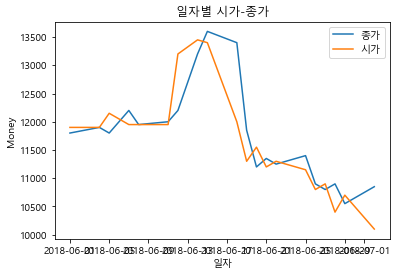

In [85]:
# 날짜별로 start와 close 값을 그래프로
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(df["Start"], label = "종가")
ax.plot(df["Close"], label = "시가")

ax.set_title("일자별 시가-종가")
ax.set_xlabel("일자")
ax.set_ylabel("Money")

ax.legend(loc = "best")

plt.show()